Модель после обучения загружена на Hugging Face. [Ссылка](https://huggingface.co/CCRss/Yolo-on-custom-dataset)

Эксперименты обучения проводились на 2 датасетах


[Люди](https://universe.roboflow.com/raman-hrynkevich/people_dataset/dataset/1)


[Документы со штампом](https://universe.roboflow.com/test-xgevo/document1/dataset/1)

In [ ]:
# Проверяем стоит ли GPU
!nvidia-smi

import os
HOME = os.getcwd()
print(HOME)

Tue May 14 20:53:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Установка зависимостей и импортов
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/201.2 GB disk)


In [ ]:
# Объявление предобученной модели на которой мы будем обучаться
model = YOLO(f'{HOME}/yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 98.0MB/s]

100%|██████████| 104k/104k [00:00<00:00, 42.5MB/s]
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 94.3ms
Speed: 14.1ms preprocess, 94.3ms inference, 924.3ms postprocess per image at shape (1, 3, 640, 384)


Особенности датасета:



1.   835 images
2.   images размером 416x416
3.   Создан в 2021 году





In [ ]:
# Скачиваем датасет с Roboflow

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow  --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="dBFV88Px0SKsjWmhvuaZ")
project = rf.workspace("raman-hrynkevich").project("people_dataset")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to People_Dataset-1 in yolov8:: 100%|██████████| 1810/1810 [00:00<00:00, 8312.85it/s]


**Обучение модели**

Параметры модели:



*   Обучаем на 25 эпохах
*   Устанавливаем параметр imgsz=416, т.к наши изображения имеют такое разрешение
*   batch=16 (отвечает за то какое количество данных мы будем брать за шаг)



In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=416 plots=True batch=16

/content
New https://pypi.org/project/ultralytics/8.2.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/People_Dataset-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualiz

# Матрица ошибок (Confusion Matrix) после обучения YOLO модели

На основе представленной матрицы ошибок, полученной после обучения модели YOLO для обнаружения людей, можно сделать следующие выводы:

- **True Positives (421):** Модель правильно обнаружила 421 человек.
- **False Negatives (45):** Модель не смогла обнаружить 45 человек, они остались как фон.
- **False Positives (97):** Модель ошибочно определила 97 объектов как людей, хотя они являются фоном.
- **True Negatives (очень много):** Модель правильно распознала фон (не людей) в большом количестве случаев.

### Вывод
Модель в основном хорошо справляется с обнаружением людей, но имеет некоторое количество ложных срабатываний и пропусков, что указывает на области для дальнейшего улучшения и настройки модели.


/content


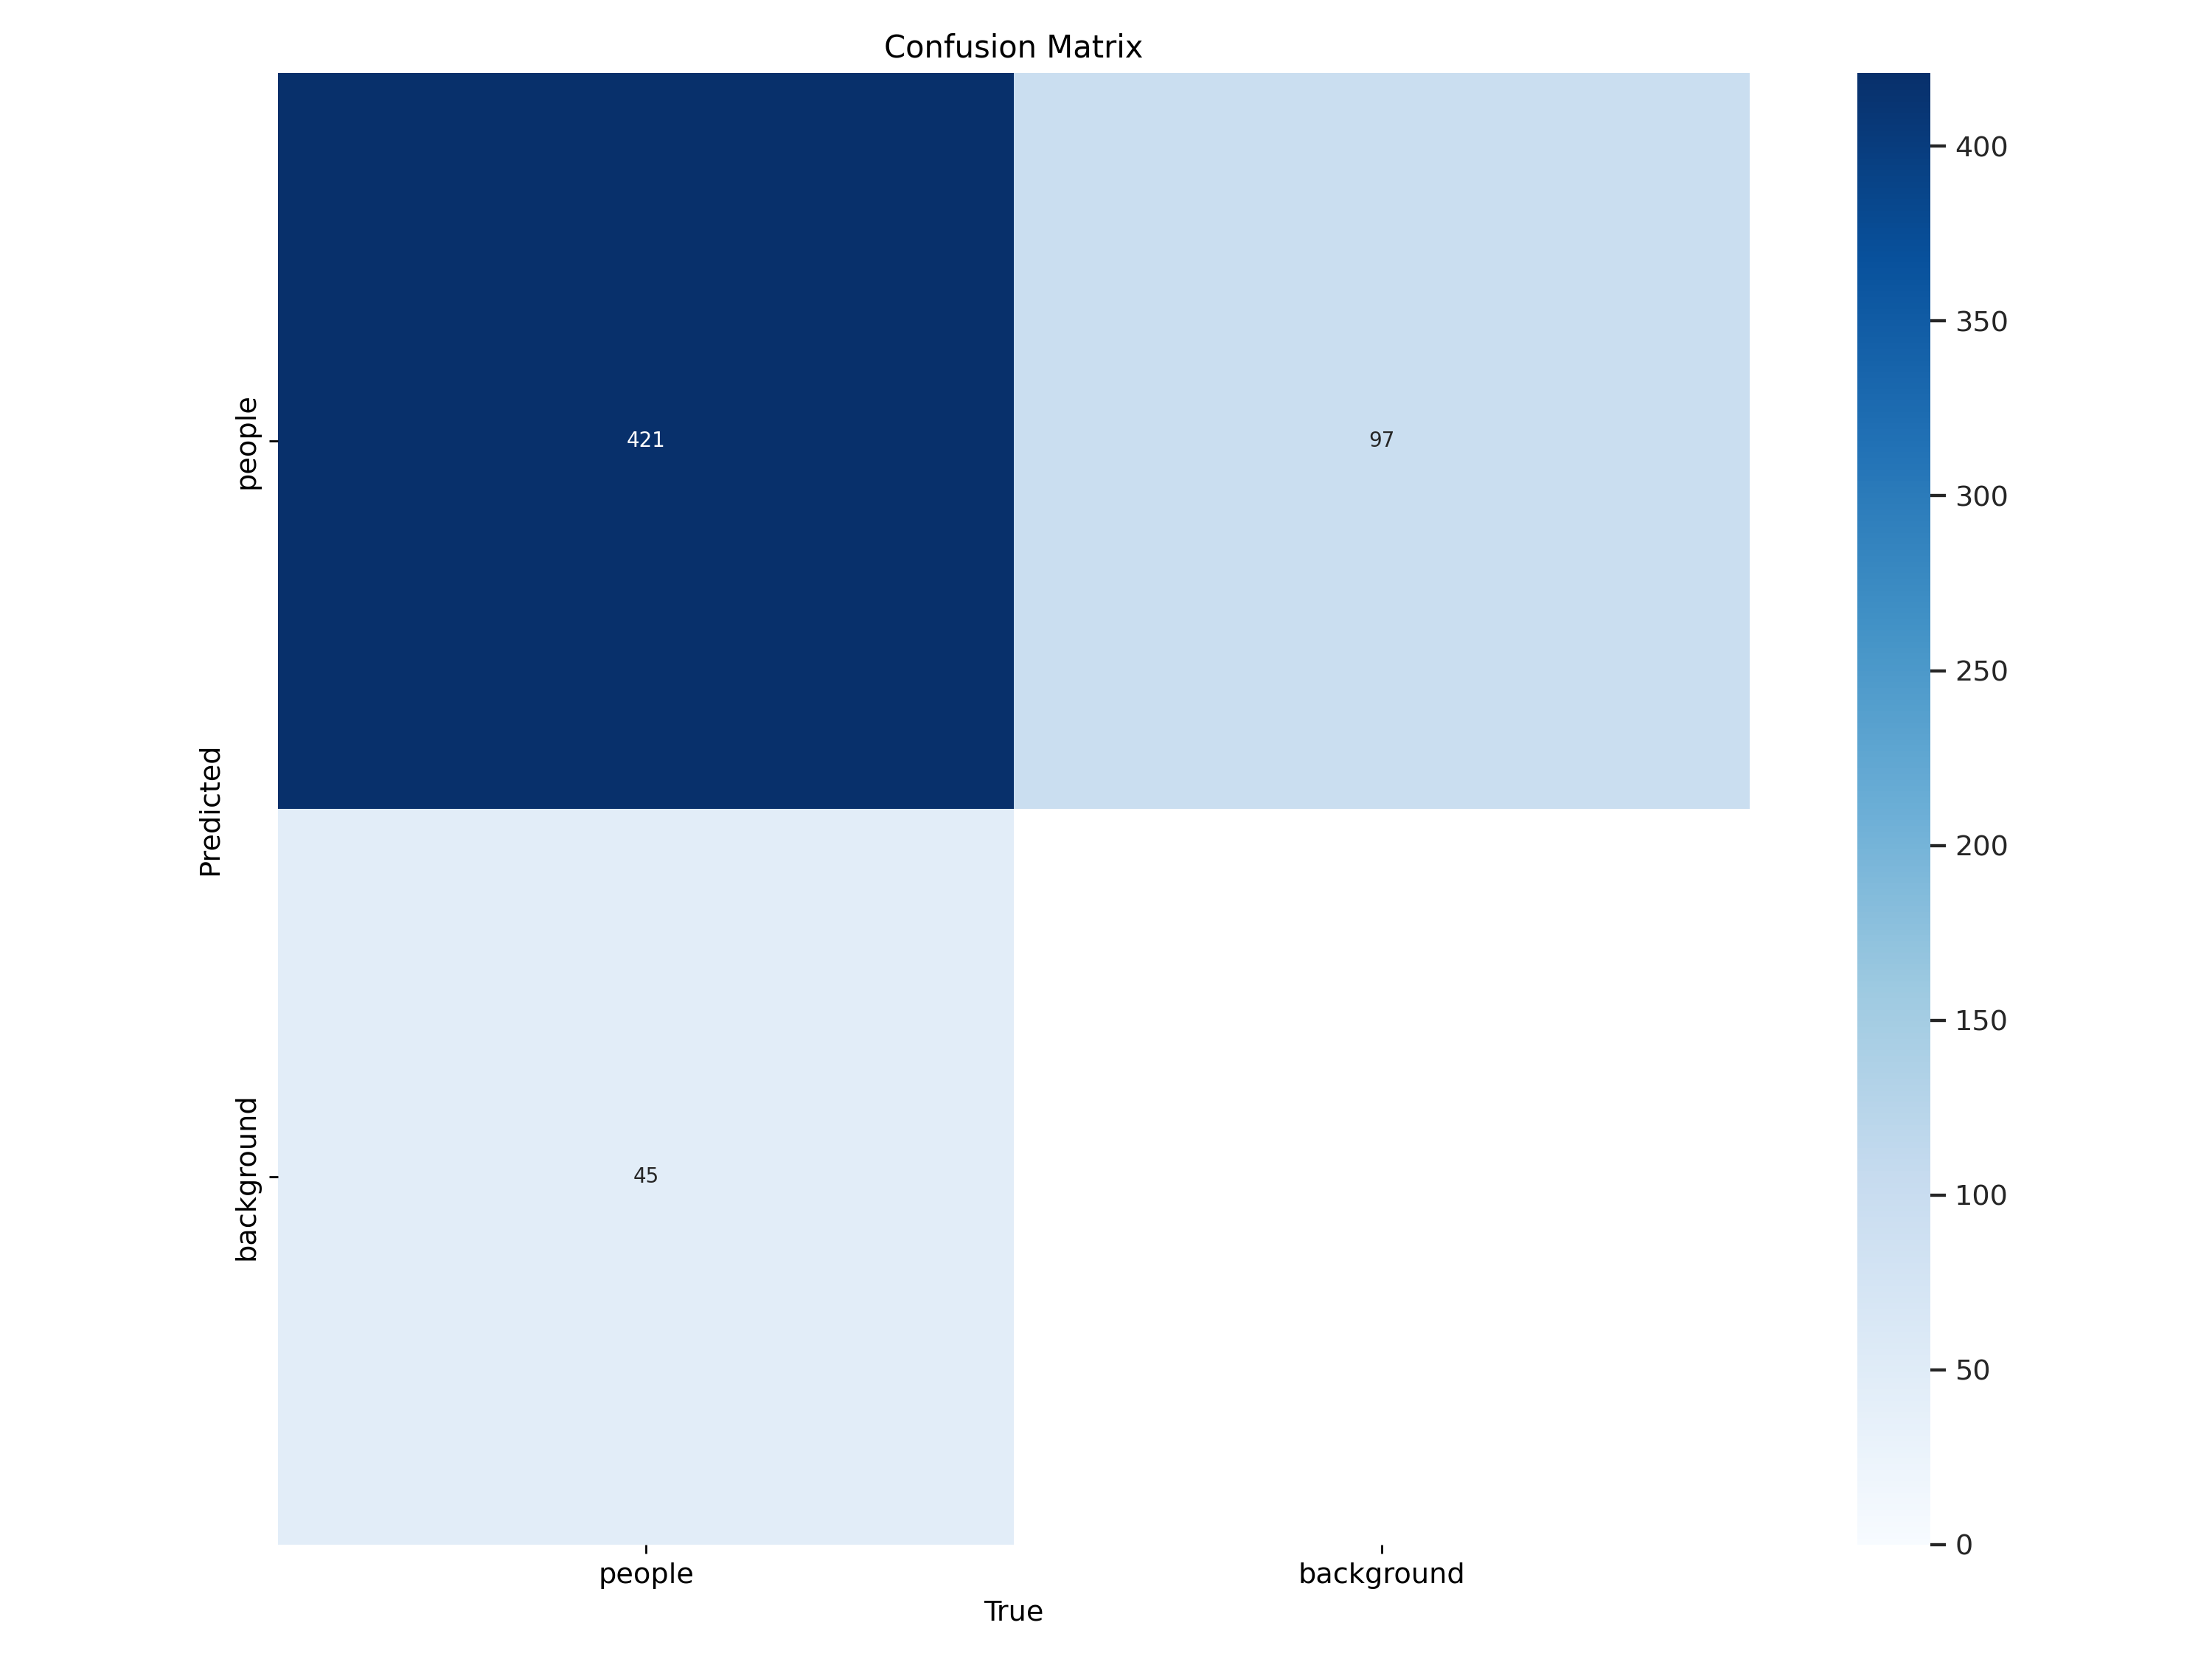

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

# Анализ графиков потерь и метрик для модели YOLO

## Графики потерь (Loss)

1. **train/box_loss**:
   - Потери боксов на тренировочной выборке уменьшаются, что указывает на улучшение точности определения границ объектов.
2. **train/cls_loss**:
   - Потери классификации на тренировочной выборке также уменьшаются, показывая, что модель становится лучше в классификации объектов.
3. **train/dfl_loss**:
   - Потери от функции распределения на тренировочной выборке снижаются, что свидетельствует о повышении уверенности модели в предсказаниях.

4. **val/box_loss**:
   - Потери боксов на валидационной выборке уменьшаются, что показывает, что модель хорошо обобщается на новых данных.
5. **val/cls_loss**:
   - Потери классификации на валидационной выборке также уменьшаются, подтверждая улучшение классификации на новых данных.
6. **val/dfl_loss**:
   - Потери от функции распределения на валидационной выборке снижаются, указывая на повышение уверенности предсказаний на новых данных.

## Метрики

1. **metrics/precision(B)**:
   - **Точность (Precision)**: Эта метрика измеряет процент правильно предсказанных положительных случаев от всех предсказанных положительных. Высокая точность означает, что модель редко делает ложные положительные предсказания.
   - График показывает, что точность модели увеличивается и стабилизируется на высоком уровне.

2. **metrics/recall(B)**:
   - **Полнота (Recall)**: Эта метрика измеряет процент правильно предсказанных положительных случаев от всех фактических положительных. Высокая полнота означает, что модель редко пропускает настоящие положительные случаи.
   - График показывает, что полнота модели увеличивается и достигает высокого уровня.

3. **metrics/mAP50(B)**:
   - **Средняя точность при 50% пороге (mAP50)**: Эта метрика измеряет среднюю точность при разных порогах пересечения (Intersection over Union, IoU). Значение mAP50 указывает на точность при 50% пороге пересечения.
   - График показывает, что средняя точность модели увеличивается и стабилизируется на высоком уровне.

4. **metrics/mAP50-95(B)**:
   - **Средняя точность при порогах от 50% до 95% (mAP50-95)**: Эта метрика измеряет среднюю точность при различных порогах пересечения от 50% до 95%. Она более строгая и дает лучшее представление о производительности модели в различных условиях.
   - График показывает, что средняя точность модели увеличивается и стабилизируется на высоком уровне.

### Вывод
Графики потерь и метрик показывают, что модель обучается правильно, потери уменьшаются, а метрики точности, полноты и средней точности показывают улучшение и стабилизацию на высоких уровнях. Это указывает на то, что модель хорошо обобщается и эффективно распознает объекты.


/content


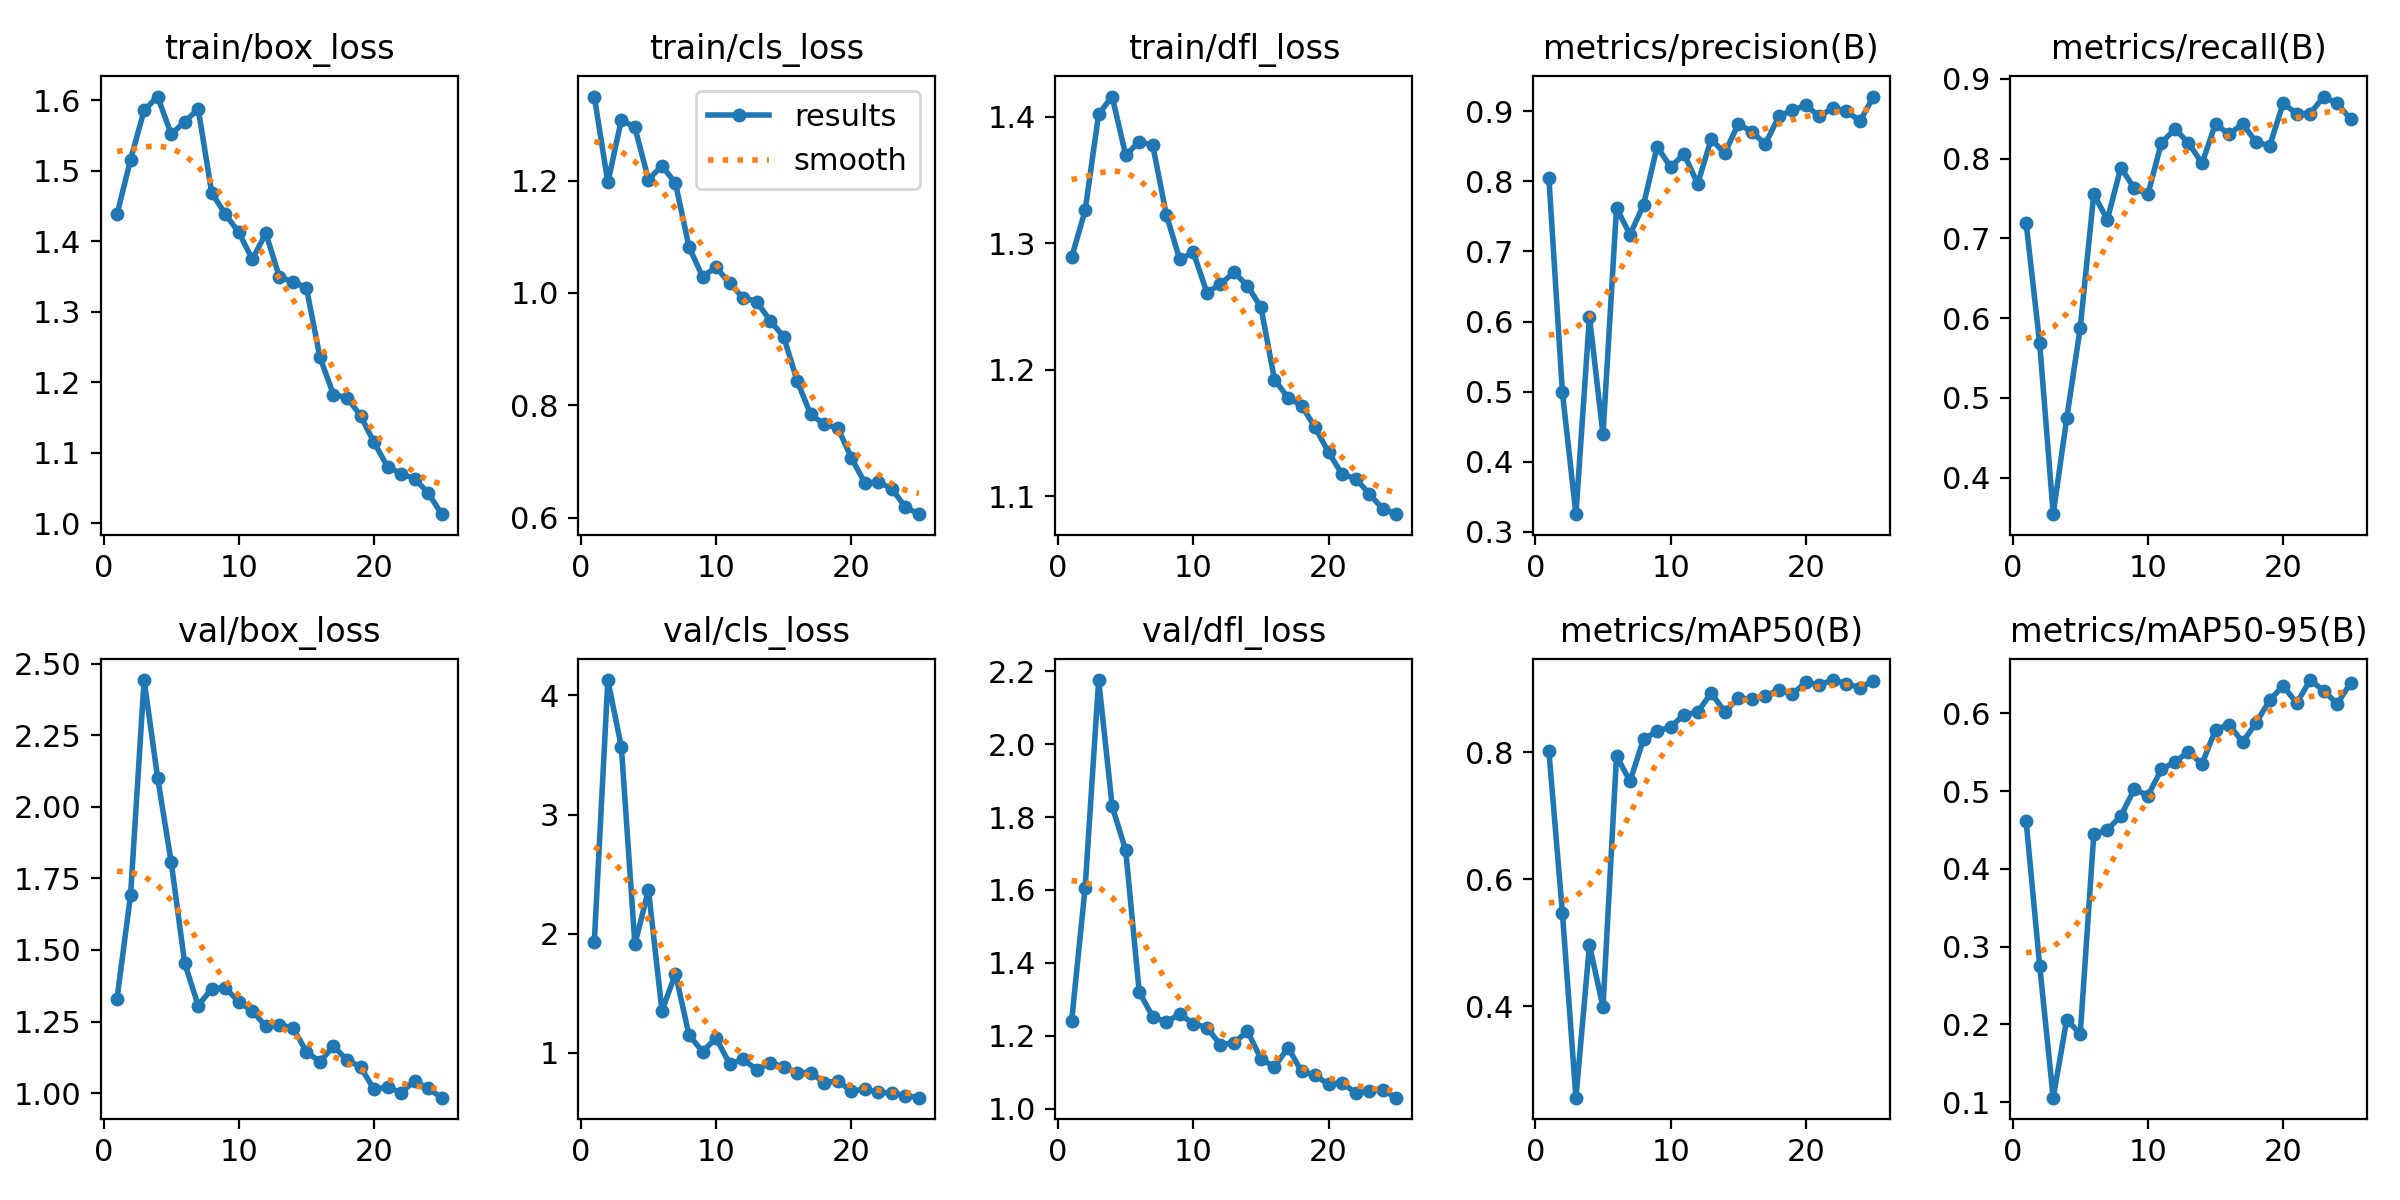

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

# Результаты обнаружения объектов

На изображении показаны результаты работы модели YOLO по обнаружению людей. Каждое выделение красным прямоугольником обозначает область, в которой модель обнаружила человека.

- **Точность обнаружения:** Каждый прямоугольник имеет метку "people" и числовое значение (например, 0.9), которое представляет уверенность модели в правильности обнаружения.
- **Высокая уверенность:** Большинство обнаружений имеют высокие значения уверенности (0.8 и выше), что указывает на хорошую производительность модели.
- **Разнообразие сцен:** Модель успешно обнаруживает людей в различных сценах и условиях освещения.


/content


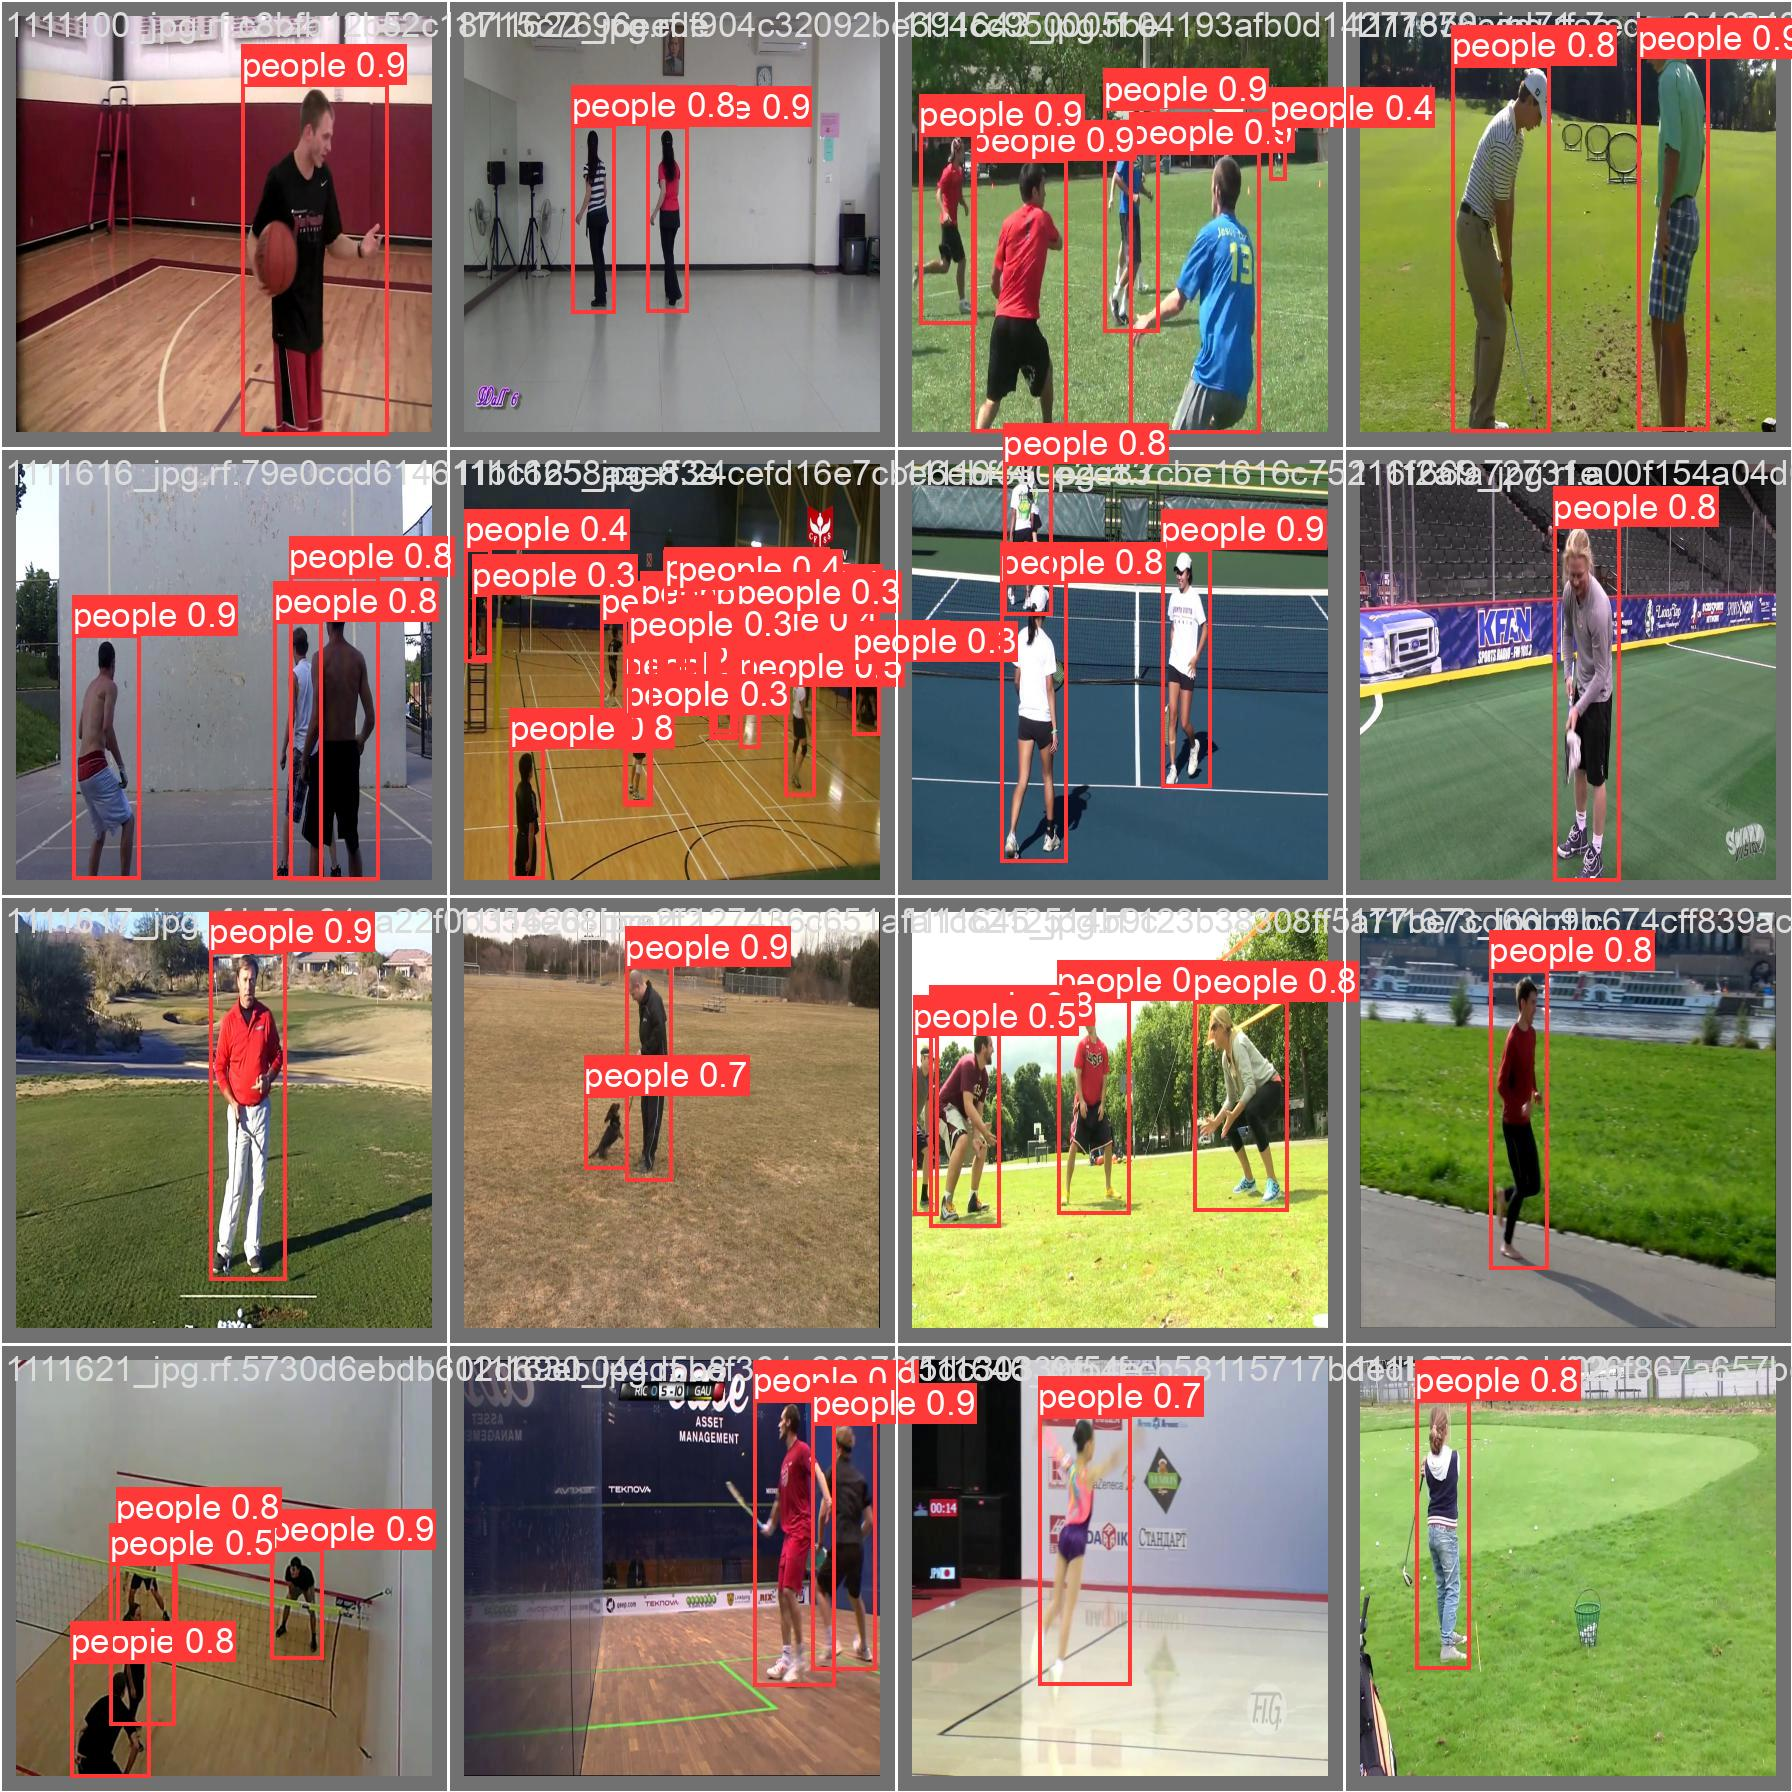

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

### Тест обученной модели


In [ ]:
%cd {HOME}
!wget https://huggingface.co/CCRss/Yolo-on-custom-dataset/resolve/main/lol1.png
!wget https://huggingface.co/CCRss/Yolo-on-custom-dataset/resolve/main/lol2.png

!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/lol1.png' save=True
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source='/content/lol2.png' save=True

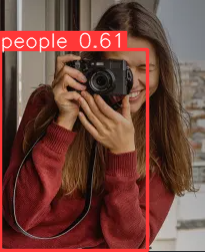

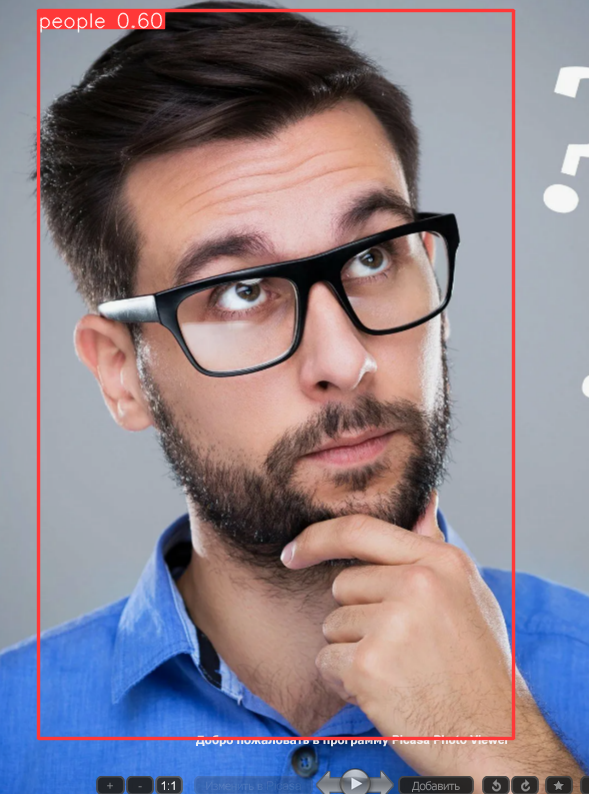

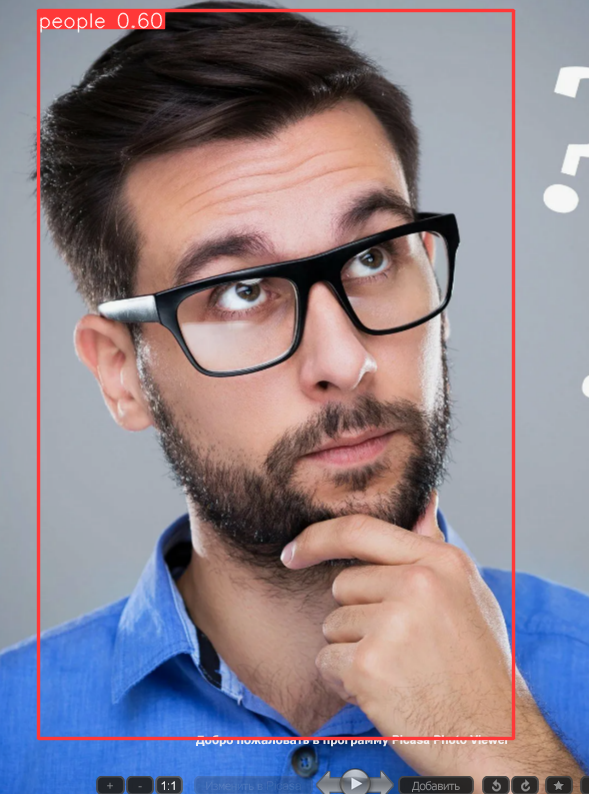

In [ ]:
import os
from IPython.display import display, Image

# Step 2: Define the path to the 'detect' folder
detect_path = os.path.expanduser('/content/runs/detect')

# List to store all image paths
image_files = []

# Step 3: Traverse all subdirectories in 'detect'
for subdir, dirs, files in os.walk(detect_path):
    # Step 4: Check if the subdirectory is a 'predict' folder
    if 'predict' in subdir:
        # Iterate through all files in the 'predict' folder
        for file in files:
            # Check if the file is an image (you can add more extensions if needed)
            if file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                # Create the full file path
                file_path = os.path.join(subdir, file)
                # Add the file path to the list
                image_files.append(file_path)

# Step 6: Sort images by modification time and get the last 3
image_files.sort(key=os.path.getmtime, reverse=True)
latest_images = image_files[:3]

# Step 7: Display the last 3 images
for image in latest_images:
    display(Image(filename=image, height=600))


### Тест нашей модели скаченной с Hugging Face В 1 клик

In [ ]:
# Зависимости
!pip install ultralytics==8.0.196
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image
import os

# Скачиваем модельку
%cd /content
!wget https://huggingface.co/CCRss/Yolo-on-custom-dataset/resolve/main/yolo8-trained.pt -O yolo8-trained.pt
model = YOLO('/content/yolo8-trained.pt')

# Скачиваем изображения для теста
!mkdir -p /content/test
!wget https://huggingface.co/CCRss/Yolo-on-custom-dataset/resolve/main/lol1.png -O /content/test/lol1.png
!wget https://huggingface.co/CCRss/Yolo-on-custom-dataset/resolve/main/lol2.png -O /content/test/lol2.png

# Запускаем предсказания и сохраняем результаты
!yolo task=detect mode=predict model=/content/yolo8-trained.pt conf=0.25 source=/content/test/lol1.png save=True
!yolo task=detect mode=predict model=/content/yolo8-trained.pt conf=0.25 source=/content/test/lol2.png save=True

# Определяем путь к папке 'runs/detect'
detect_path = os.path.expanduser('/content/runs/detect')

# Список для хранения путей к изображениям
image_files = []

# Проходим по всем подкаталогам в 'runs/detect'
for subdir, dirs, files in os.walk(detect_path):
    # Ищем все файлы изображений
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            # Полный путь к файлу
            file_path = os.path.join(subdir, file)
            # Добавляем путь к списку
            image_files.append(file_path)

# Сортируем изображения по времени модификации и получаем последние 3
image_files.sort(key=os.path.getmtime, reverse=True)
latest_images = image_files[:3]

# Отображаем последние 3 изображения
for image in latest_images:
    display(Image(filename=image, height=600))


### Проблема штампов

Понял, давайте переформулируем:

**Проблема:**
1. **Изображение 1:** Модель обучена на штампах, успешно определяет штамп.
2. **Изображение 2:** Модель обучена на людях, не определяет штамп.

**Причины:**
- **Разные задачи:** Модели обучены на разных объектах (штампы vs. люди).
- **Нет знаний о штампах:** Модель, обученная на людях, не распознает штампы, так как не видела их во время обучения.

**Решение:**
- **Объединить датасеты:** Обучить модель на обоих типах объектов (штампы и люди).
- **Тонкая настройка:** Тонко настроить модель, добавив изображения штампов к уже обученной модели на людях.

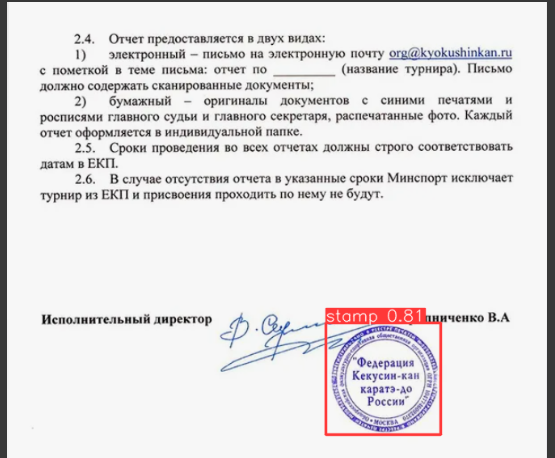

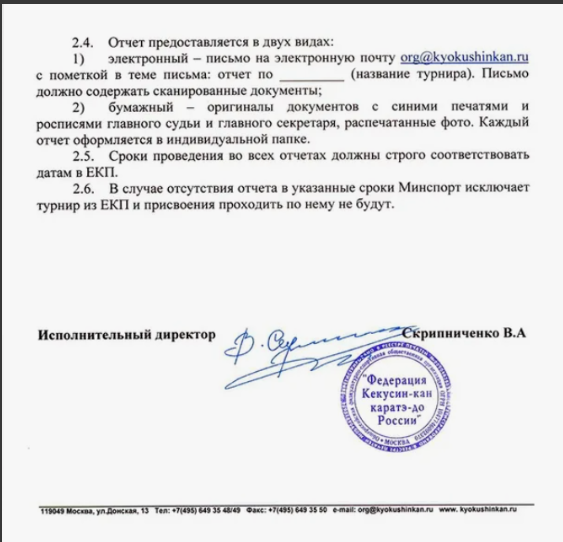

### Загрузка обученной модели на Hugging Face

In [ ]:
# Токен из Hugging Face
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="/content/runs/detect/train2/weights/best.pt",
    path_in_repo="yolo8-trained.pt", #
    repo_id="CCRss/Yolo-on-custom-dataset", #
    repo_type="model", #
)